In [1]:
import pandas as pd
import sys
import os
import numpy as np

# añadir carpeta padre al path
sys.path.append(os.path.abspath(".."))

from factorial_analisis import analisis_factorial_por_etapa, pruebas_no_parametricas, asignar_etapa



In [2]:
PATH = '../../datos/datos_por_estacion/SUROESTE.xlsx'

In [3]:
df_2021 = pd.read_excel(PATH, sheet_name='2021')
df_2022 = pd.read_excel(PATH, sheet_name='2022')
df_2023 = pd.read_excel(PATH, sheet_name='2023')
df_2024 = pd.read_excel(PATH, sheet_name='2024')

df = pd.concat([df_2021, df_2022, df_2023, df_2024], ignore_index=True)

In [4]:
df

,date,CO,NO,NO2,NOX,O3,PM10,PM2.5,PRS,RAINF,RH,SO2,SR,TOUT,WSR,WDR,WDV
0,2021-01-01 00:00:00,1.71,0.5,0.5,0.9,12.0,62.0,57.59,NaN,NaN,46.0,5.3,0.000,10.73,7.1,NaN,NaN
1,2021-01-01 01:00:00,2.12,0.5,0.5,0.9,8.0,79.0,NaN,698.6,0.0,54.0,6.0,0.000,9.46,8.4,21.0,NaN
2,2021-01-01 02:00:00,1.51,0.5,0.5,0.9,7.0,140.0,55.45,698.9,0.0,69.0,5.3,0.000,7.39,8.5,20.0,NaN
3,2021-01-01 03:00:00,1.46,0.5,0.5,0.8,10.0,79.0,50.38,699.2,0.0,72.0,5.1,0.000,6.35,3.5,20.0,NaN
4,2021-01-01 04:00:00,1.46,0.5,0.5,0.8,6.0,75.0,50.97,699.5,0.0,74.0,5.0,0.000,5.69,3.9,21.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31385,2024-07-31 19:00:00,0.32,3.5,8.1,11.4,28.0,80.0,32.21,700.5,0.0,53.0,3.1,0.094,30.15,18.3,NaN,91.0
31386,2024-07-31 20:00:00,0.31,3.6,9.2,12.6,21.0,94.0,31.25,700.8,0.0,53.0,3.0,0.094,28.80,16.0,NaN,91.0
31387,2024-07-31 21:00:00,0.30,3.3,8.8,11.8,20.0,85.0,31.10,701.2,0.0,55.0,2.9,0.094,27.95,13.3,NaN,96.0
31388,2024-07-31 22:00:00,0.27,3.0,6.8,9.7,21.0,83.0,32.72,701.7,0.0,53.0,3.0,NaN,27.50,12.8,NaN,99.0


In [5]:
columns = ['CO', 'PM10', 'PM2.5', 'SO2', 'NO2', 'O3', 'date']

df = df[columns]

In [6]:
inicio_construccion = pd.to_datetime('2022-08-30')
inicio_construccion

Timestamp('2022-08-30 00:00:00')

In [139]:
df

,CO,PM10,PM2.5,SO2,NO2,O3
0,4.95,68.0,64.10,3.2,NaN,22.0
1,4.73,68.0,46.00,3.3,NaN,27.0
2,4.72,55.0,47.64,3.3,NaN,23.0
3,4.82,57.0,52.07,3.6,15.8,25.0
4,5.02,65.0,61.62,3.5,NaN,25.0
...,...,...,...,...,...,...
31384,0.60,77.0,32.42,2.7,6.4,28.0
31385,0.57,89.0,31.45,2.7,6.7,23.0
31386,0.59,90.0,31.75,2.7,6.0,23.0
31387,0.57,85.0,33.73,2.7,5.9,22.0


In [7]:
df["fecha"] = df["date"]

C:\Users\Vivi\AppData\Local\Temp\ipykernel_28972\3120508067.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["fecha"] = df["date"]


In [158]:
df

,CO,PM10,PM2.5,SO2,NO2,O3,date,fecha
0,4.95,68.0,64.10,3.2,NaN,22.0,2021-01-01 00:00:00,2021-01-01 00:00:00
1,4.73,68.0,46.00,3.3,NaN,27.0,2021-01-01 01:00:00,2021-01-01 01:00:00
2,4.72,55.0,47.64,3.3,NaN,23.0,2021-01-01 02:00:00,2021-01-01 02:00:00
3,4.82,57.0,52.07,3.6,15.8,25.0,2021-01-01 03:00:00,2021-01-01 03:00:00
4,5.02,65.0,61.62,3.5,NaN,25.0,2021-01-01 04:00:00,2021-01-01 04:00:00
...,...,...,...,...,...,...,...,...
31384,0.60,77.0,32.42,2.7,6.4,28.0,2024-07-31 19:00:00,2024-07-31 19:00:00
31385,0.57,89.0,31.45,2.7,6.7,23.0,2024-07-31 20:00:00,2024-07-31 20:00:00
31386,0.59,90.0,31.75,2.7,6.0,23.0,2024-07-31 21:00:00,2024-07-31 21:00:00
31387,0.57,85.0,33.73,2.7,5.9,22.0,2024-07-31 22:00:00,2024-07-31 22:00:00


In [8]:
df = asignar_etapa(df)

In [9]:
df

,CO,PM10,PM2.5,SO2,NO2,O3,date,fecha,etapa
0,1.71,62.0,57.59,5.3,0.5,12.0,2021-01-01 00:00:00,2021-01-01 00:00:00,0
1,2.12,79.0,NaN,6.0,0.5,8.0,2021-01-01 01:00:00,2021-01-01 01:00:00,0
2,1.51,140.0,55.45,5.3,0.5,7.0,2021-01-01 02:00:00,2021-01-01 02:00:00,0
3,1.46,79.0,50.38,5.1,0.5,10.0,2021-01-01 03:00:00,2021-01-01 03:00:00,0
4,1.46,75.0,50.97,5.0,0.5,6.0,2021-01-01 04:00:00,2021-01-01 04:00:00,0
...,...,...,...,...,...,...,...,...,...
31385,0.32,80.0,32.21,3.1,8.1,28.0,2024-07-31 19:00:00,2024-07-31 19:00:00,2
31386,0.31,94.0,31.25,3.0,9.2,21.0,2024-07-31 20:00:00,2024-07-31 20:00:00,2
31387,0.30,85.0,31.10,2.9,8.8,20.0,2024-07-31 21:00:00,2024-07-31 21:00:00,2
31388,0.27,83.0,32.72,3.0,6.8,21.0,2024-07-31 22:00:00,2024-07-31 22:00:00,2


In [10]:
resultados = pruebas_no_parametricas(df, columns, tipo='independiente')

In [11]:
resultados

,Contaminante,Comparacion,Estadistico,p-valor
0,CO,0 vs 1,113511739.0,0.000000e+00
1,CO,0 vs 2,21888130.0,2.184873e-18
2,CO,1 vs 2,16843140.0,2.314298e-171
3,PM10,0 vs 1,98286778.5,1.837240e-59
4,PM10,0 vs 2,25900363.0,4.475343e-01
5,PM10,1 vs 2,21168566.0,1.290867e-24
6,PM2.5,0 vs 1,85476504.5,2.815758e-12
7,PM2.5,0 vs 2,20003644.5,7.593943e-19
8,PM2.5,1 vs 2,16634288.0,1.890097e-06
9,SO2,0 vs 1,114190223.0,0.000000e+00



=== Etapa 0 ===
Chi-cuadrado Bartlett: 16387.30, p-valor: 0.000
KMO global: 0.674
=> Datos adecuados para análisis factorial
Número de factores sugerido (eigen>1): 2


c:\Users\Vivi\Documents\Repos\Anlaisis-de-Calidad-del-Aire\venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Vivi\Documents\Repos\Anlaisis-de-Calidad-del-Aire\venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


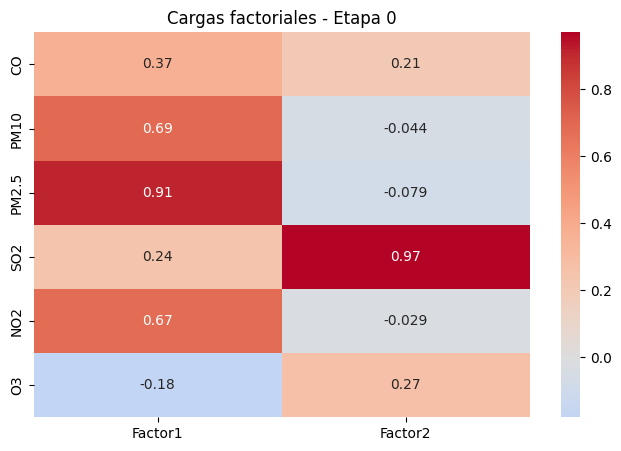


=== Etapa 1 ===
Chi-cuadrado Bartlett: 17433.88, p-valor: 0.000
KMO global: 0.767
=> Datos adecuados para análisis factorial
Número de factores sugerido (eigen>1): 2


c:\Users\Vivi\Documents\Repos\Anlaisis-de-Calidad-del-Aire\venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Vivi\Documents\Repos\Anlaisis-de-Calidad-del-Aire\venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


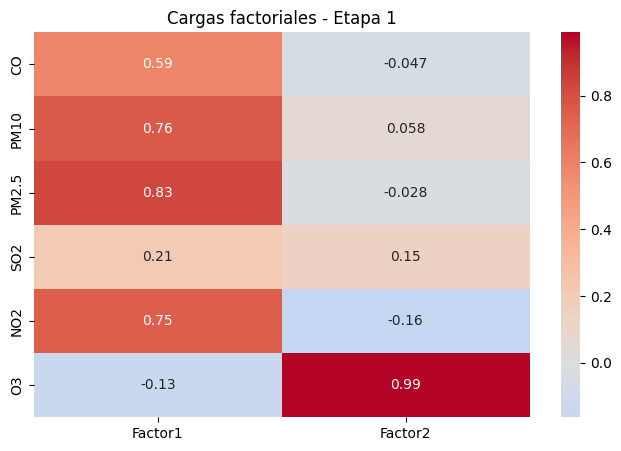


=== Etapa 2 ===
Chi-cuadrado Bartlett: 4517.29, p-valor: 0.000
KMO global: 0.625
=> Datos adecuados para análisis factorial
Número de factores sugerido (eigen>1): 2


c:\Users\Vivi\Documents\Repos\Anlaisis-de-Calidad-del-Aire\venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Vivi\Documents\Repos\Anlaisis-de-Calidad-del-Aire\venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


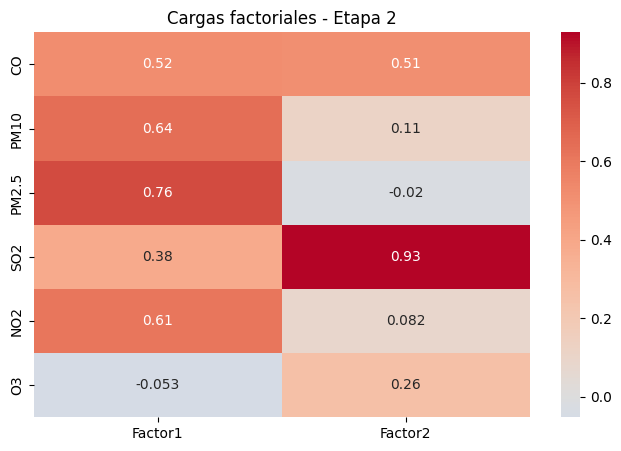

In [12]:
contaminantes = ['CO', 'PM10', 'PM2.5', 'SO2', 'NO2', 'O3']

# Supongamos df ya tiene columna 'etapa' creada~
resultados_fa = analisis_factorial_por_etapa(df, variables=contaminantes)
